In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
dfday = pd.read_pickle('../../data/time_ecom/dfday.pkl')
dfday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 1 to 137
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      137 non-null    datetime64[ns]
 1   y       137 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.3 KB


In [3]:
dfday.tail(3)

,ds,y
135,2015-09-14,173
136,2015-09-15,145
137,2015-09-16,111


In [4]:
# default = changepoint_prior_scale=0.05  (increasing adds flexibility)
m = Prophet(changepoint_prior_scale=0.05)
m.fit(dfday)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
dffuture = m.make_future_dataframe(periods=28)
dffuture.tail(3)

,ds
162,2015-10-12
163,2015-10-13
164,2015-10-14


In [10]:
dfforecast = m.predict(dffuture)
# dfforecast.columns.values

array(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower',
       'trend_upper', 'additive_terms', 'additive_terms_lower',
       'additive_terms_upper', 'weekly', 'weekly_lower', 'weekly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'], dtype=object)

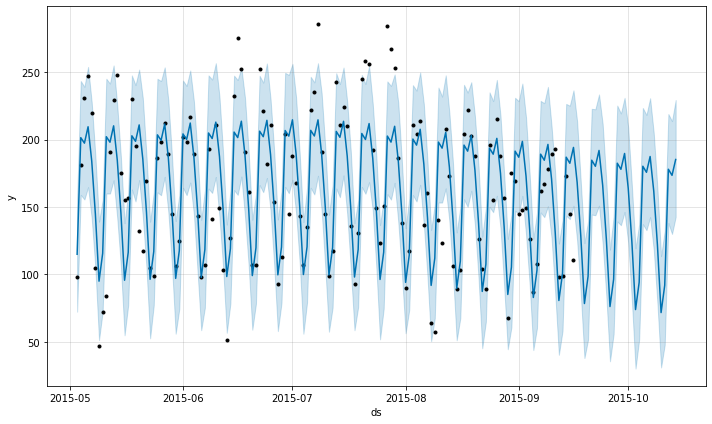

In [7]:
# plt.style.use('seaborn-white')  # didnt change prophet chart
fig1 = m.plot(dfforecast)
# fig1.savefig('../img/fb_plot_def.png')

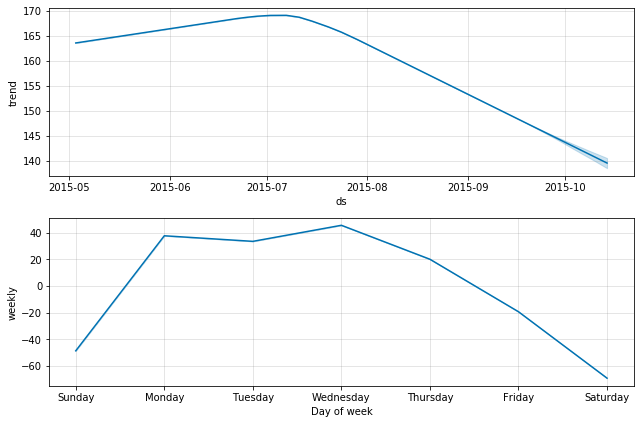

In [8]:
fig2 = m.plot_components(dfforecast)
# fig2.savefig('../img/fb_comp_def.png')

In [19]:
dfforecast['yhat'].shape # is 165 = 137 + 28
dfforecast.iloc[-28: , -1].values

array([168.33640613, 128.59568988,  78.38259278,  98.61280862,
       184.70403854, 180.19202731, 191.93694035, 166.0955564 ,
       126.35484016,  76.14174305,  96.37195889, 182.46318882,
       177.95117758, 189.69609063, 163.85470668, 124.11399043,
        73.90089333,  94.13110916, 180.22233909, 175.71032786,
       187.4552409 , 161.61385695, 121.8731407 ,  71.6600436 ,
        91.89025944, 177.98148937, 173.46947813, 185.21439117])

In [20]:
dfday[['ds']].head()

,ds
1,2015-05-03
2,2015-05-04
3,2015-05-05
4,2015-05-06
5,2015-05-07
